# SETUP

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import tensorflow_datasets as tfds

tf.keras.backend.set_floatx("float64")

GPU device not found
Found GPU at: 


# Dataset Loading

This cell instantiates a data loader class, which is used for handling the dataset. A preproccesed image and segmentation dataset is loaded with the specified configurations.

In [2]:
dataset = "birds"
test_size=300
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()
cardinality = int(img_ds.cardinality())

img_test = img_ds.take(test_size)
seg_test = seg_ds.take(test_size)
img_train = img_ds.skip(test_size)
seg_train = seg_ds.skip(test_size)    

# Activation Functions

These are possible activation functions that could be used. I couldn't get them working properly but they can be used to regularise the input if implemented correctly.

In [3]:
def scaledtanh(x): 
    return tf.math.tanh(x*0.1)

def scaledatanh(x):
    return tf.math.atanh(x)*10

# Image PCWN Training
This cell trains a PCWN for the image dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filekgk2nzdi.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filekgk2nzdi.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
saving to: models/birds_img
out.shape (1, 8, 8, 65)
keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), 

array([[[0.27008128, 0.28064421, 0.2655094 ],
        [0.38739637, 0.35198328, 0.33714408],
        [0.38972121, 0.34810048, 0.33324143],
        ...,
        [0.367019  , 0.3329657 , 0.30647978],
        [0.37094057, 0.3367494 , 0.31026348],
        [0.30813515, 0.2966134 , 0.26521379]],

       [[0.66326326, 0.58776957, 0.58084911],
        [0.80415881, 0.70532471, 0.68793178],
        [0.78976983, 0.69844759, 0.6888454 ],
        ...,
        [0.75839198, 0.66592878, 0.61928356],
        [0.75358462, 0.66813731, 0.61798412],
        [0.68000299, 0.58340728, 0.54997849]],

       [[0.6968922 , 0.61844289, 0.61110866],
        [0.83544469, 0.73163509, 0.71890271],
        [0.81858146, 0.74812973, 0.72153729],
        ...,
        [0.80047488, 0.70722967, 0.66525668],
        [0.79425818, 0.70082986, 0.65885681],
        [0.70557719, 0.60927969, 0.56927943]],

       ...,

       [[0.47861594, 0.36434832, 0.1931047 ],
        [0.57447916, 0.42998859, 0.22955179],
        [0.57341862, 0

sample.shape (128, 128, 3)


pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  23.503094337726104
ncc =  [[1.         0.93212407]
 [0.93212407 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.77472883 0.77616066 0.77672744 0.77509189]
 [0.78182495 0.77208829 0.77824754 0.77369434]
 [0.76794982 0.77254903 0.78054416 0.78288096]
 [0.77533704 0.77432597 0.78153747 0.77191639]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.78784809 0.76302093 0.78327304 0.77275476]
 [0.77205219 0.7599441  0.77036723 0.7545525 ]
 [0.78002914 0.77054406 0.77583323 0.77324925]
 [0.77106354 0.76996129 0.77781159 0.76747454]], shape=(4, 4), dtype=float64)


(23.503094337726104,
 array([[1.        , 0.93212407],
        [0.93212407, 1.        ]]))

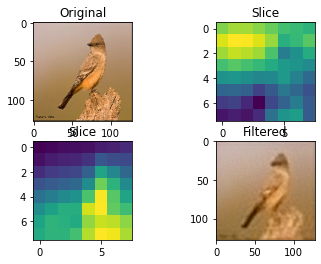

In [4]:
model_name = "img"
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_test)

# Segmentation PCWN Training
This cell trains a PCWN for the segmentation dataset. The model broker is instantiated and used to build, load and check the model with the specified configurations. 

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 6 keep_max 12.0
keep_channels 6
ufilts.shape (1, 1, 1, 27, 6)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([54 54], shape=(2,), dtype=int32)
keep_channels 13 keep_max 96.0
keep_channels 13
ufilts.shape (1, 1, 1, 54, 13)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([117 117], shape=(2,), dtype=int32)
keep_channels 29 keep_max 832.0
keep_channels 29
ufilts.shape (1, 1, 1, 117, 29)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([261 261], shape=(2,), dtype=int32)
keep_channels 65 keep_max 7424.0
keep_channels 65
ufilts.shape (1, 1, 1, 261, 65)
end loop 8.0
saving to: models/birds_seg
out.shape (1, 8, 8, 65)
keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype

array([[[0.453125  , 0.60281867, 0.75894612],
        [0.3846201 , 0.5183211 , 0.64056373],
        [0.29479167, 0.45484069, 0.4939951 ],
        ...,
        [0.45992649, 0.48590687, 0.18039216],
        [0.84037989, 0.84681374, 0.56660539],
        [0.35704657, 0.46292895, 0.19662991]],

       [[0.45772058, 0.63952208, 0.84123778],
        [0.42493874, 0.6106618 , 0.79025739],
        [0.37536764, 0.54037994, 0.71715689],
        ...,
        [0.4302696 , 0.41537991, 0.12046569],
        [0.68241423, 0.72022063, 0.38719362],
        [0.53480393, 0.60147059, 0.29558825]],

       [[0.46875   , 0.64105392, 0.86354166],
        [0.44810051, 0.60968137, 0.83609068],
        [0.41672796, 0.56942403, 0.76838237],
        ...,
        [0.21390931, 0.24920344, 0.03921569],
        [0.44846815, 0.45238972, 0.19142157],
        [0.29246324, 0.32775736, 0.06709559]],

       ...,

       [[0.65931374, 0.68756127, 0.5169118 ],
        [0.60674024, 0.65275735, 0.3918505 ],
        [0.43033087, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 65)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  18.737382707772625
ncc =  [[1.         0.88286658]
 [0.88286658 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.36250001 0.40612745 0.66354167 0.52824754]
 [0.31795344 0.36715686 0.5436275  0.36200982]
 [0.34473041 0.3846201  0.62573534 0.5409314 ]
 [0.44736519 0.46256128 0.61819857 0.89381129]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.34000292 0.34410832 0.42015047 0.47182159]
 [0.33891549 0.34499808 0.41207498 0.47232917]
 [0.4276832  0.44755258 0.49837894 0.52861743]
 [0.48889144 0.52661338 0.5567066  0.52568149]], shape=(4, 4), dtype=float64)


(18.737382707772625,
 array([[1.        , 0.88286658],
        [0.88286658, 1.        ]]))

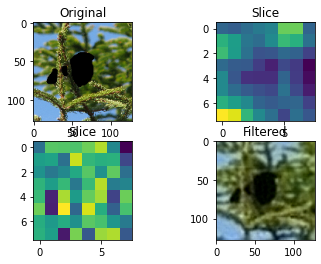

In [5]:
model_name = "seg"
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=0.1,
                            count=4,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()
seg_broker.check_build(seghead,seginvhead,seg_test)

# Linear Least Squares Training (Convolutional)

The following cells are used to find a matrix A and vector b which are used to map the image decomposition onto a segmentation decomposition.

In [6]:
shape = imghead(next(iter(img_train))[0]).shape

In [7]:
shape

TensorShape([1, 8, 8, 65])

In [8]:
shape_0 = shape[3]
shape_1 = shape[1]*shape[2]
shape_2 = shape[1]

In [9]:
reconstruct = next(iter(seg_train))[0].shape

In [10]:
n = 0.0


xxt = np.zeros([shape_0,shape_0])
yxt = np.zeros([shape_0,shape_0])
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(seg_train.cardinality()))

for item in iter(zip(img_train,seg_train)):
    bar.update(1)
    image = item[0][0]
    segmentation = item[1][0]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/5733 [00:00<?, ?it/s]

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [11]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [12]:
inverse_xxt = tf.linalg.pinv(xxt)

In [13]:
A = tf.matmul(inverse_xxt,yxt)

In [14]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [15]:
A_filter = tf.reshape(A,(1,1,shape_0,shape_0)) 

In [16]:
def iou_coef(y_true, y_pred,smooth=1):
  intersection = tf.reduce_sum(y_true * y_pred, 0)
  union = tf.reduce_sum(y_true,0)+tf.reduce_sum(y_pred,0)-intersection
  iou = tf.reduce_mean((intersection+1) / (union+1), 0)
  return float(iou)

In [17]:
def dice_coef(y_true, y_pred,smooth=1):
    y_true_f = tf.reshape(y_true,-1)
    y_pred_f =tf.reshape(y_pred,-1)
    intersection = tf.reduce_sum(y_true_f * y_pred_f,0)

    return float((2. * intersection+smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)+smooth))

0.18668639053254438
0.6423909644087079


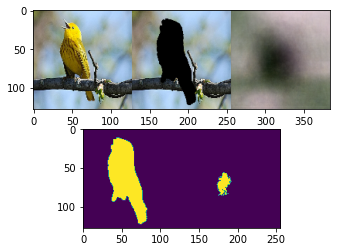

In [20]:
threshold_intensity = 0.1
skip = np.random.randint(0,70)
image,seg_base = next(iter(zip(img_test.skip(skip),seg_test.skip(skip))))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

y_true = tf.cast(tf.reduce_min(seg_base[0],2)==0,tf.float64)
y_pred = tf.cast(tf.reduce_min(seg[0],2)<threshold_intensity,tf.float64)

print(dice_coef(y_true,y_pred))
print(iou_coef(y_true,y_pred))
plt.subplot(2,1,1)
plt.imshow(np.hstack([image[0],seg_base[0],seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([y_true,y_pred]))

In [ ]:
for split in ["train","test"]:
    if split == "train":
        img_ds, seg_ds = (img_train,seg_train)
    else:
        img_ds, seg_ds = (img_test,seg_test)
    n = int(seg_ds.cardinality())
    dice_coeff_vals = []
    for image,seg_base in iter(zip(img_ds, seg_ds)):
        imgdecom = imghead(image[0])
        conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
        conv = tf.nn.bias_add(conv,b)
        seg = seginvhead(conv)
        y_true = tf.cast(tf.reduce_min(seg_base[0],2)==0,tf.float64)
        y_pred = tf.cast(tf.reduce_min(seg[0],2)<threshold_intensity,tf.float64)
        dice_coeff_vals.append(dice_coef(y_true,y_pred))
    dice_coeff_mean = sum(dice_coeff_vals)/n
    dice_coeff_std = (sum([((x - dice_coeff_mean) ** 2) for x in dice_coeff_vals]) / n)**0.5
    np.save(f"PCWN_CONN_{dataset}_{split}",dice_coeff_vals)